In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [31]:
#matplotlib.use('ngAgg')

## Line plot

In [32]:
s1 = np.random.randn(10)
s2 =np.arange(0,100, 10)
print(s1)
print(s2)

[-0.20261884  0.70842235  0.32015838  1.50445069  2.07135815 -1.10161857
 -0.69397603 -0.32466919  0.97034118 -0.10737318]
[ 0 10 20 30 40 50 60 70 80 90]


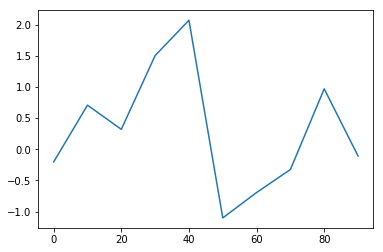

In [33]:
plt.plot(s2, s1)

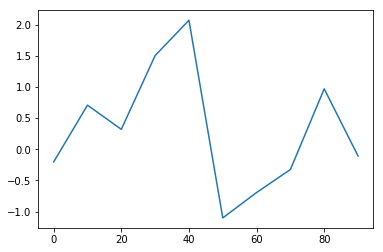

In [34]:
s = pd.Series(s1, index=s2)
s.plot()

In [35]:
df = pd.DataFrame(np.random.randn(10,4), index=np.arange(0,100, 10))

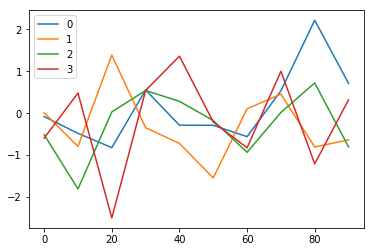

In [36]:
df.plot()

## bar plot

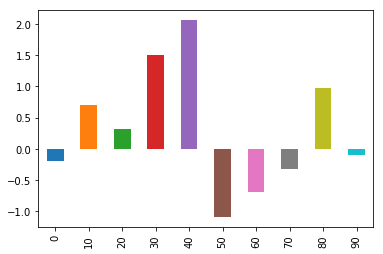

In [37]:
s.plot(kind='bar')

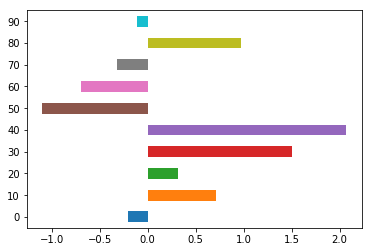

In [38]:
s.plot(kind='barh')

## Histogram

In [39]:
x = np.arange(0,100,1)

In [40]:
s3 = pd.Series(x)

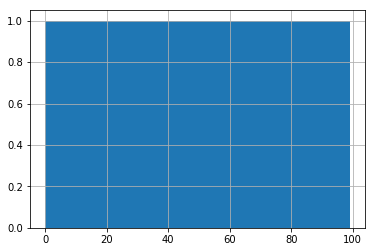

In [41]:
s3.hist(bins=100)

## Scatter plot

In [42]:
x1 = np.random.normal(0, 1, (100,1))
x2 = np.random.normal(1, 4, (100,1))
X = np.concatenate((x1, x2), axis=1)
df3 = pd.DataFrame(X, columns=['x1','x2'])

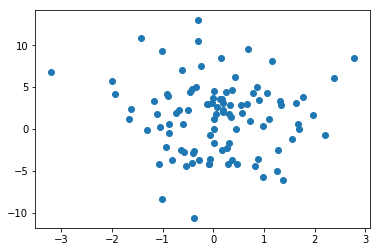

In [43]:
plt.scatter(df3['x1'], df3['x2'])

## Plot 모양

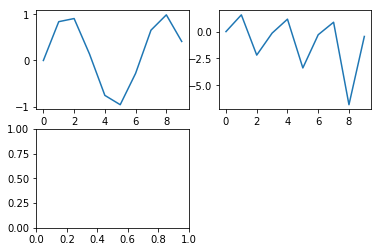

In [44]:
x = np.arange(0,10,1)
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
plt.plot(x, np.sin(x))
ax2 = fig.add_subplot(2,2,2)
plt.plot(x, np.tan(x))
ax3 = fig.add_subplot(2,2,3)

## 여러개 출력하기
* fig
* axes 설정한 크기와 같은 shape의 리스트로 각요소에 subplot객체가 들어가 있음. 

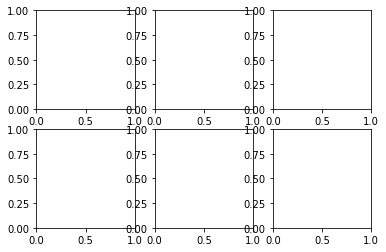

In [45]:
fig, ax = plt.subplots(2,3)


In [46]:
ax[0,0].plot(x, np.sin(x))
ax[0,1].plot(x, np.cos(x))
ax[0,2].plot(x, np.tan(x))

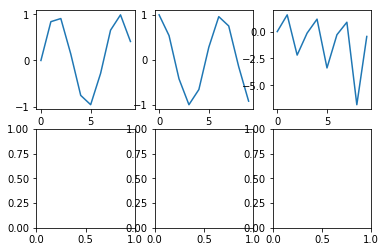

In [47]:
fig

In [48]:
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D02EA50550>,
      dtype=object)

## plot 꾸미기

color
 
"b" blue
"g" green
"r" red
"c" cyan
"m" magenta
"y" yellow
"k" black
"w" white

marker

"." point
"," pixel
"o" circle
"v" triangle_down
"^" triangle_up
"<" triangle_left
">" triangle_right
"8" octagon
"s" square
"p" pentagon
"*" star
"h" hexagon
"+" plus
"x" x
"D" diamond

line style
값 라인 스타일

"-" solid line
"--" dashed line
"-." dash-dotted line
":" dotted line
"None" draw nothing

In [49]:
ax[0,1].set_xticks([0,250,500,750,1000])
ax[0,1].set_xticklabels(['one', 'two', 'three'])

[Text(-5.0, 0, 'one'), Text(0.0, 0, 'two'), Text(5.0, 0, 'three')]

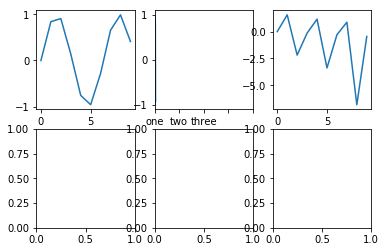

In [50]:
fig

## 이미지로 저장

In [51]:
fig.savefig('result.png')

## 3차원 함수 시각화

In [52]:
def f(x,y):
    return np.sin(x) ** 10 + np.cos(10+y * x) * np.cos(x)

In [53]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,40)
X, Y = np.meshgrid(x,y)
Z = f(X,Y)

##### contour

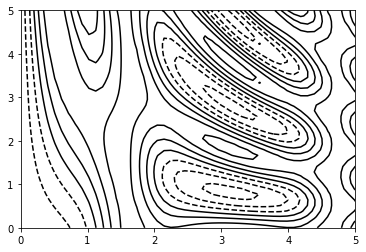

In [54]:
plt.contour(X, Y, Z, colors='black')

* 음수값은 점선으로 양수값은 실선

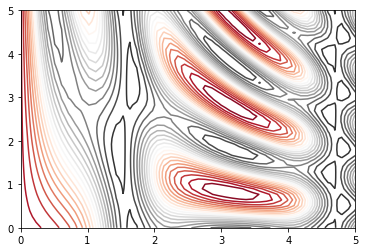

In [55]:
plt.contour(X, Y, Z, 20, cmap='RdGy')

##### coutourf

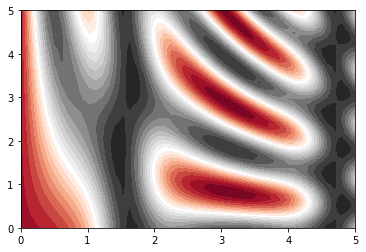

In [56]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')